In [ ]:
! pip install pandas
! pip install mlflow
! pip install xgboost
! pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Load and Explore the Dataset
import pandas as pd
train_df = pd.read_csv(r"C:\Users\mythi\Downloads\playground-series-s4e12\train.csv")
test_df = pd.read_csv(r"C:\Users\mythi\Downloads\playground-series-s4e12\test.csv")

In [4]:
print("Train shape:",train_df.shape)
print("Test shape:",test_df.shape)

Train shape: (1200000, 21)
Test shape: (800000, 20)


In [5]:
print("\nFrist 5 rows of train dataset:")
print(train_df.head())


Frist 5 rows of train dataset:
   id   Age  Gender  Annual Income Marital Status  Number of Dependents  \
0   0  19.0  Female        10049.0        Married                   1.0   
1   1  39.0  Female        31678.0       Divorced                   3.0   
2   2  23.0    Male        25602.0       Divorced                   3.0   
3   3  21.0    Male       141855.0        Married                   2.0   
4   4  21.0    Male        39651.0         Single                   1.0   

  Education Level     Occupation  Health Score  Location  ... Previous Claims  \
0      Bachelor's  Self-Employed     22.598761     Urban  ...             2.0   
1        Master's            NaN     15.569731     Rural  ...             1.0   
2     High School  Self-Employed     47.177549  Suburban  ...             1.0   
3      Bachelor's            NaN     10.938144     Rural  ...             1.0   
4      Bachelor's  Self-Employed     20.376094     Rural  ...             0.0   

   Vehicle Age  Credit Score  

In [6]:
print("\nSummary statistics:")
print(train_df.describe())


Summary statistics:
                 id           Age  Annual Income  Number of Dependents  \
count  1.200000e+06  1.181295e+06   1.155051e+06          1.090328e+06   
mean   5.999995e+05  4.114556e+01   3.274522e+04          2.009934e+00   
std    3.464103e+05  1.353995e+01   3.217951e+04          1.417338e+00   
min    0.000000e+00  1.800000e+01   1.000000e+00          0.000000e+00   
25%    2.999998e+05  3.000000e+01   8.001000e+03          1.000000e+00   
50%    5.999995e+05  4.100000e+01   2.391100e+04          2.000000e+00   
75%    8.999992e+05  5.300000e+01   4.463400e+04          3.000000e+00   
max    1.199999e+06  6.400000e+01   1.499970e+05          4.000000e+00   

       Health Score  Previous Claims   Vehicle Age  Credit Score  \
count  1.125924e+06    835971.000000  1.199994e+06  1.062118e+06   
mean   2.561391e+01         1.002689  9.569889e+00  5.929244e+02   
std    1.220346e+01         0.982840  5.776189e+00  1.499819e+02   
min    2.012237e+00         0.000000  0.

In [7]:
print("\nData types and non_null counts:")
train_df.info()


Data types and non_null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  I

In [8]:
print("Test Dataset Shape:", test_df.shape)
print("\nFirst 5 Rows of Test Dataset:")
print(test_df.head())

Test Dataset Shape: (800000, 20)

First 5 Rows of Test Dataset:
        id   Age  Gender  Annual Income Marital Status  Number of Dependents  \
0  1200000  28.0  Female         2310.0            NaN                   4.0   
1  1200001  31.0  Female       126031.0        Married                   2.0   
2  1200002  47.0  Female        17092.0       Divorced                   0.0   
3  1200003  28.0  Female        30424.0       Divorced                   3.0   
4  1200004  24.0    Male        10863.0       Divorced                   2.0   

  Education Level     Occupation  Health Score  Location    Policy Type  \
0      Bachelor's  Self-Employed      7.657981     Rural          Basic   
1        Master's  Self-Employed     13.381379  Suburban        Premium   
2             PhD     Unemployed     24.354527     Urban  Comprehensive   
3             PhD  Self-Employed      5.136225  Suburban  Comprehensive   
4     High School     Unemployed     11.844155  Suburban        Premium   

   P

In [9]:
print("\nInfo on Test Dataset:")
test_df.info()


Info on Test Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    800000 non-null  int64  
 1   Age                   787511 non-null  float64
 2   Gender                800000 non-null  object 
 3   Annual Income         770140 non-null  float64
 4   Marital Status        787664 non-null  object 
 5   Number of Dependents  726870 non-null  float64
 6   Education Level       800000 non-null  object 
 7   Occupation            560875 non-null  object 
 8   Health Score          750551 non-null  float64
 9   Location              800000 non-null  object 
 10  Policy Type           800000 non-null  object 
 11  Previous Claims       557198 non-null  float64
 12  Vehicle Age           799997 non-null  float64
 13  Credit Score          708549 non-null  float64
 14  Insurance Duration    799998 

In [34]:
# Exploratory Data Analysis (EDA)
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
print("\nMissing Values in train dataset:")
print(train_df.isnull().sum().sort_values(ascending=False))


Missing Values in train dataset:
Previous Claims         364029
Occupation              358075
Credit Score            137882
Number of Dependents    109672
Customer Feedback        77824
Health Score             74076
Annual Income            44949
Age                      18705
Marital Status           18529
Vehicle Age                  6
Insurance Duration           1
Gender                       0
id                           0
Location                     0
Policy Type                  0
Education Level              0
Policy Start Date            0
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
dtype: int64


In [12]:
print("\nMissing Values in Test Dataset:")
print(test_df.isnull().sum().sort_values(ascending=False))


Missing Values in Test Dataset:
Previous Claims         242802
Occupation              239125
Credit Score             91451
Number of Dependents     73130
Customer Feedback        52276
Health Score             49449
Annual Income            29860
Age                      12489
Marital Status           12336
Vehicle Age                  3
Insurance Duration           2
id                           0
Gender                       0
Policy Type                  0
Education Level              0
Location                     0
Policy Start Date            0
Smoking Status               0
Exercise Frequency           0
Property Type                0
dtype: int64


In [13]:
# Separate numeric and categorical columns
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = train_df.select_dtypes(include=['object']).columns.tolist()

print("Numerical columns:")
for columns in  numerical_cols:
    print(f"{columns}")

print("\nCategorical columns:")
for columns in  categorical_cols:
    print(f"{columns}")

Numerical columns:
id
Age
Annual Income
Number of Dependents
Health Score
Previous Claims
Vehicle Age
Credit Score
Insurance Duration
Premium Amount

Categorical columns:
Gender
Marital Status
Education Level
Occupation
Location
Policy Type
Policy Start Date
Customer Feedback
Smoking Status
Exercise Frequency
Property Type


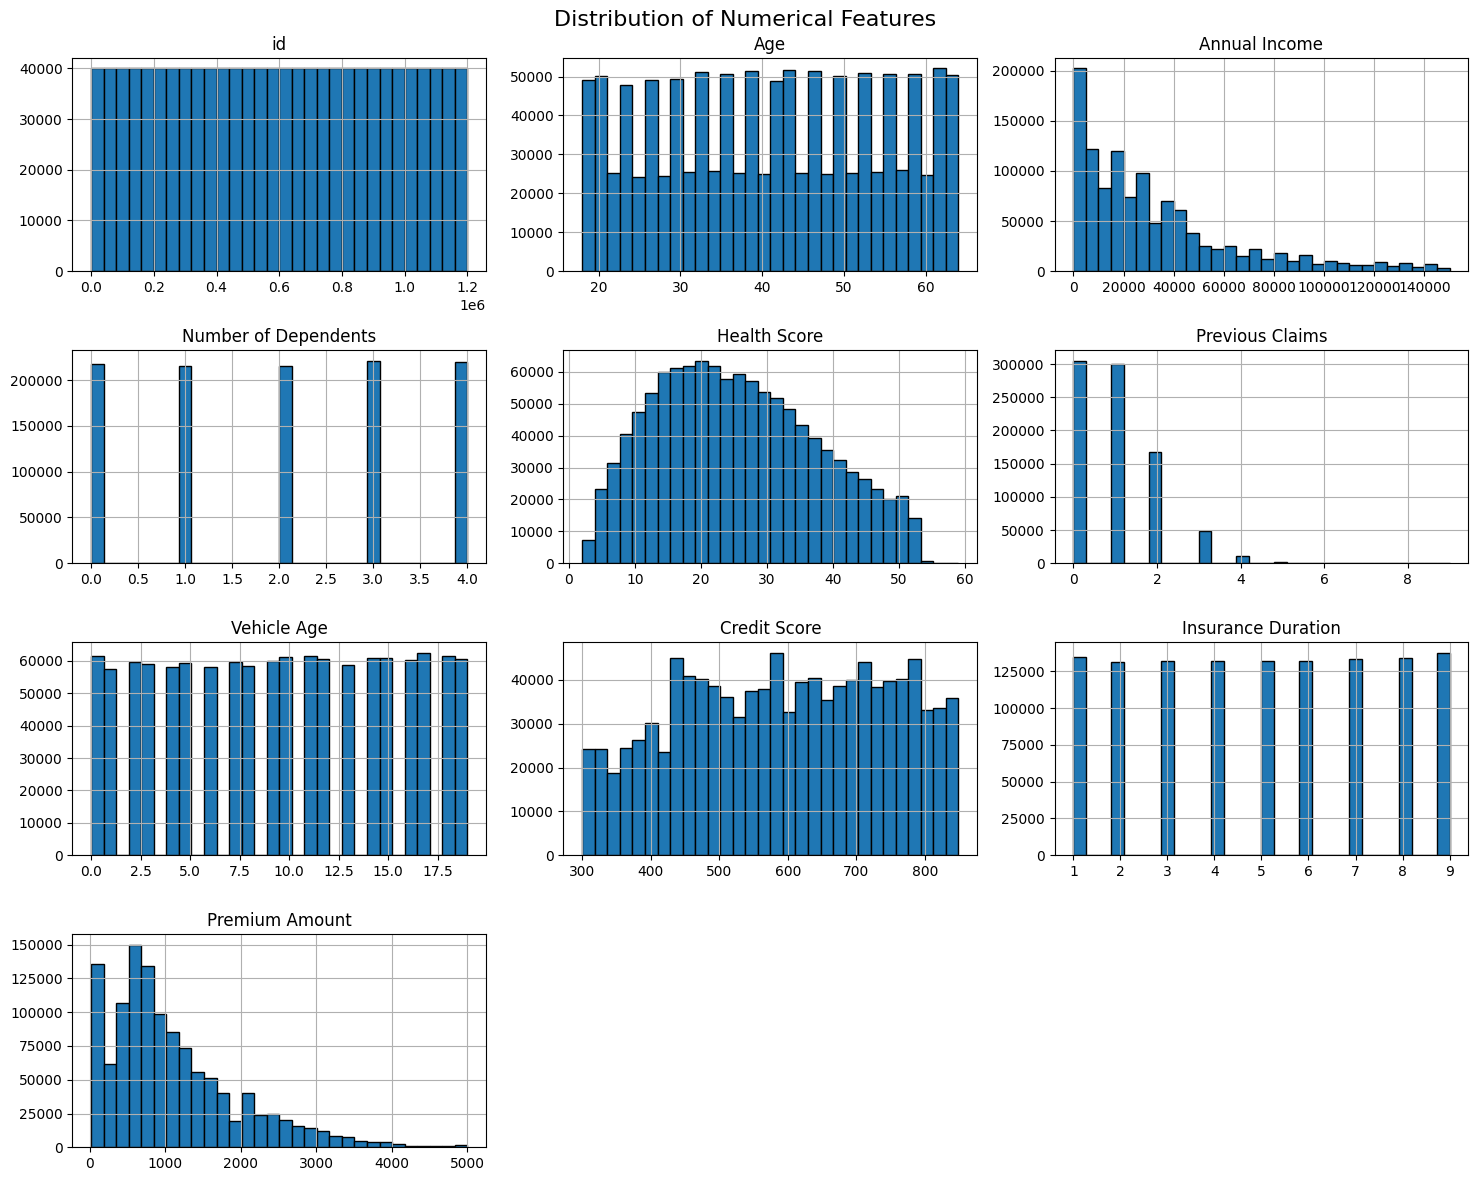

In [ ]:
#  Plot histograms for numerical features  distribution

numerical_cols = train_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
train_df[numerical_cols].hist(bins=30, figsize=(15, 12), edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

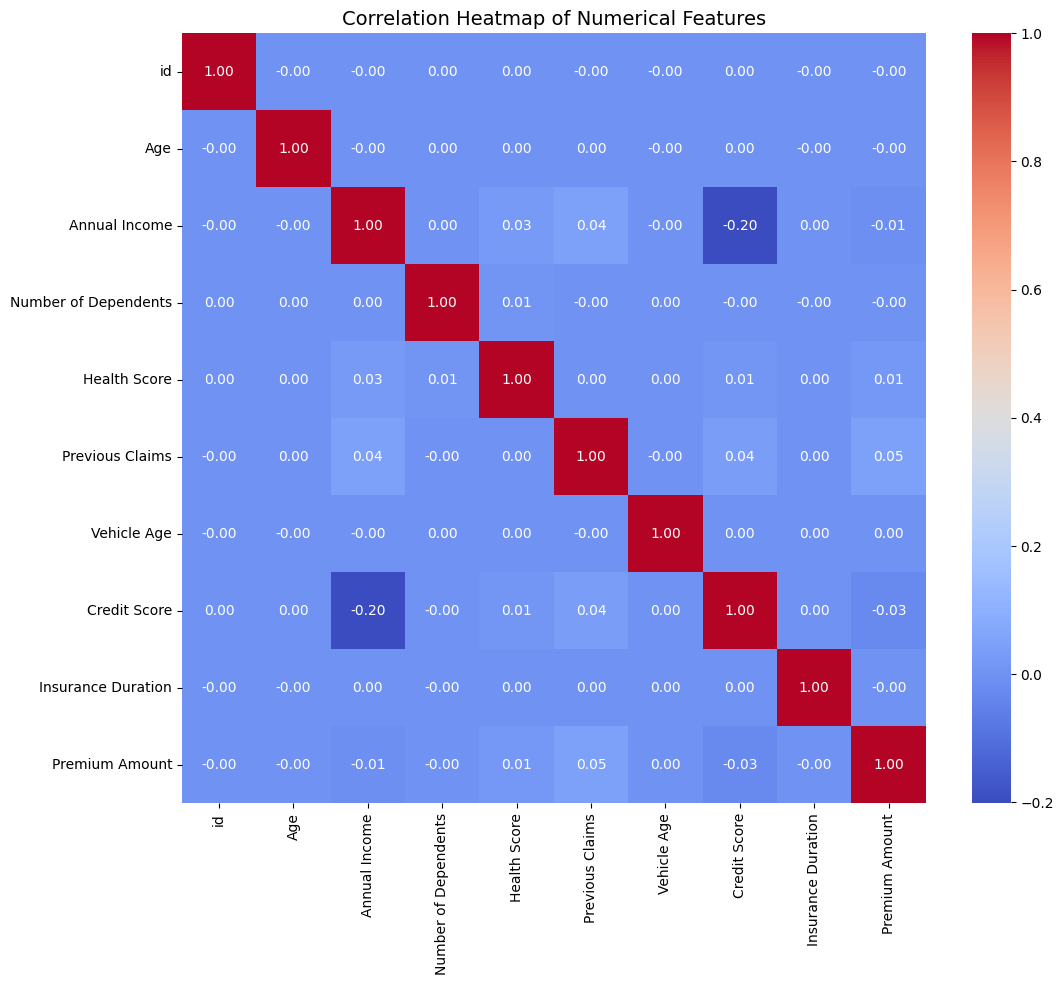

In [ ]:
# Correlation Analysis
plt.figure(figsize=(12, 10))
corr_matrix = train_df[numerical_cols].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features", fontsize=14)
plt.show()

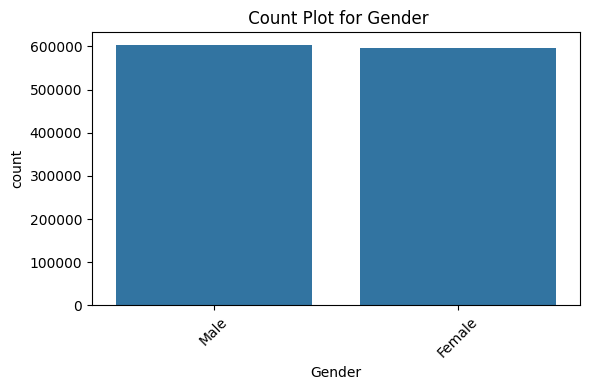

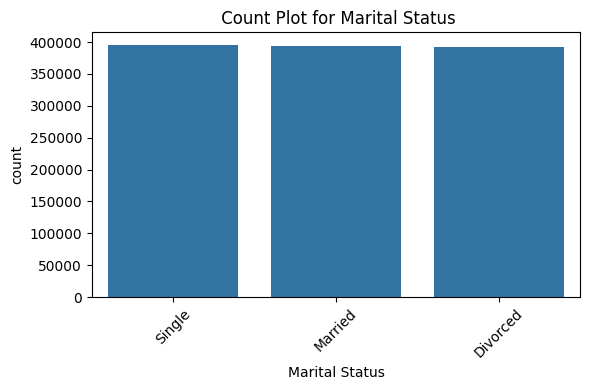

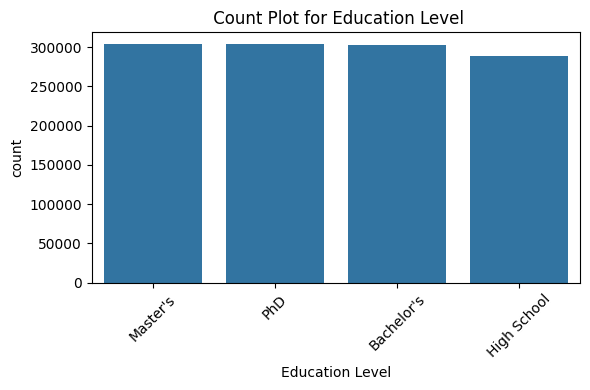

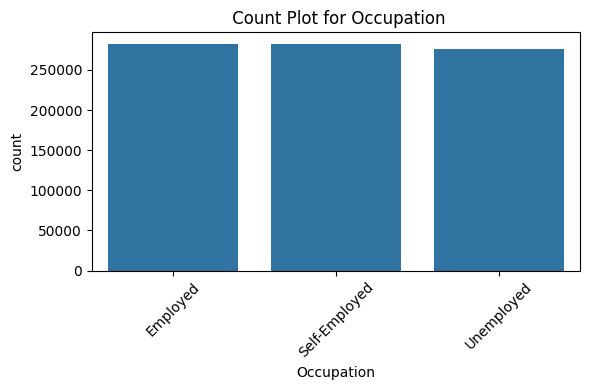

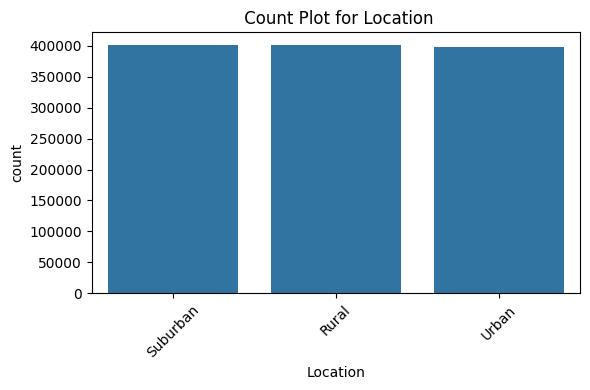

In [ ]:
categorical_cols = train_df.select_dtypes(include='object').columns.tolist()

# categorical features
for col in categorical_cols[:5]:  
    plt.figure(figsize=(6, 4))
    sns.countplot(data=train_df, x=col, order=train_df[col].value_counts().index)
    plt.title(f" Count Plot for {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


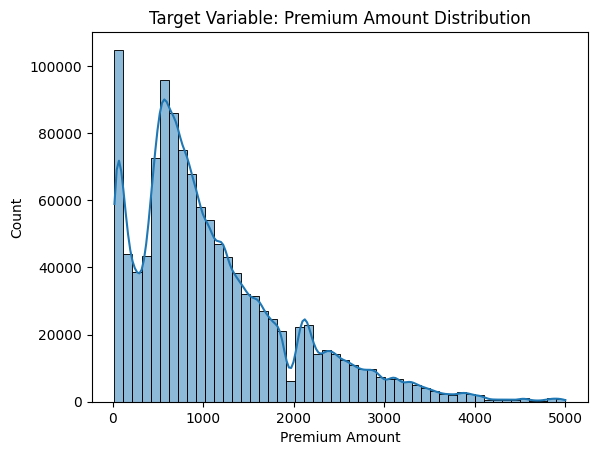

Skewness: 1.2409154932891036


In [35]:
# Target Variable Distribution
sns.histplot(train_df['Premium Amount'], kde=True, bins=50)
plt.title('Target Variable: Premium Amount Distribution')
plt.show()

# Check skewness
print("Skewness:", train_df['Premium Amount'].skew())


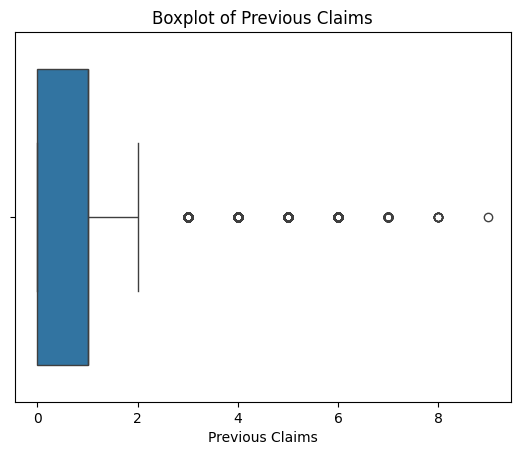

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=train_df['Previous Claims'])
plt.title("Boxplot of Previous Claims")
plt.show()

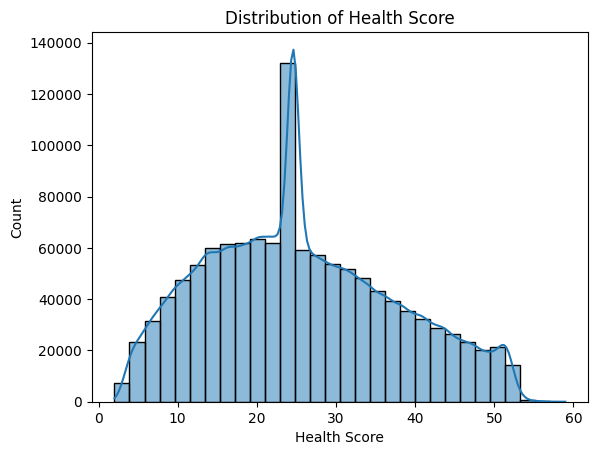

In [38]:
sns.histplot(train_df['Health Score'], bins=30, kde=True)
plt.title("Distribution of Health Score")
plt.show()

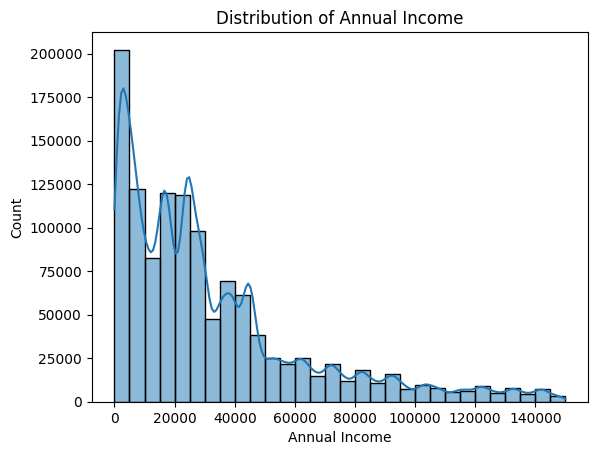

In [39]:
sns.histplot(train_df['Annual Income'], bins=30, kde=True)
plt.title("Distribution of Annual Income")
plt.show()

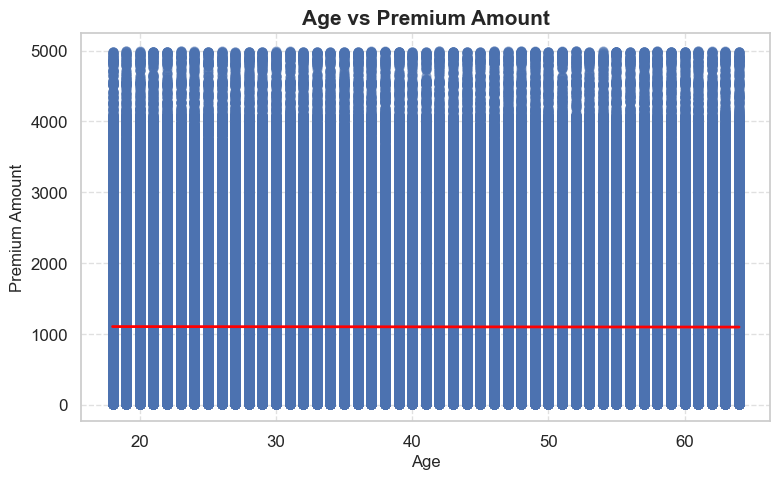

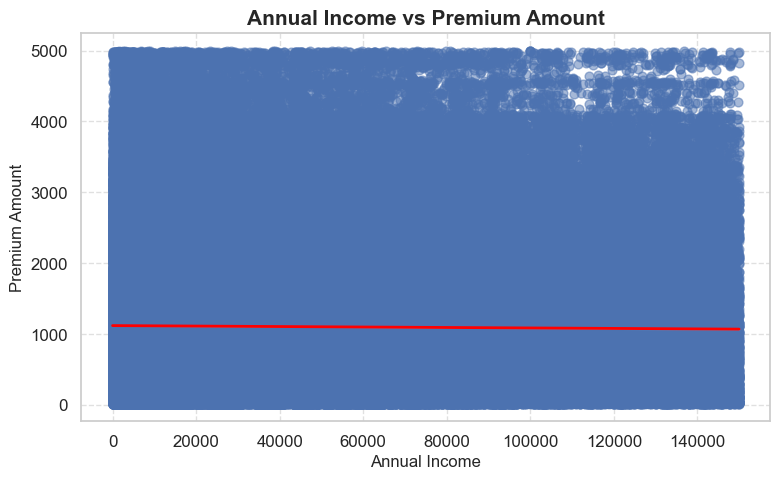

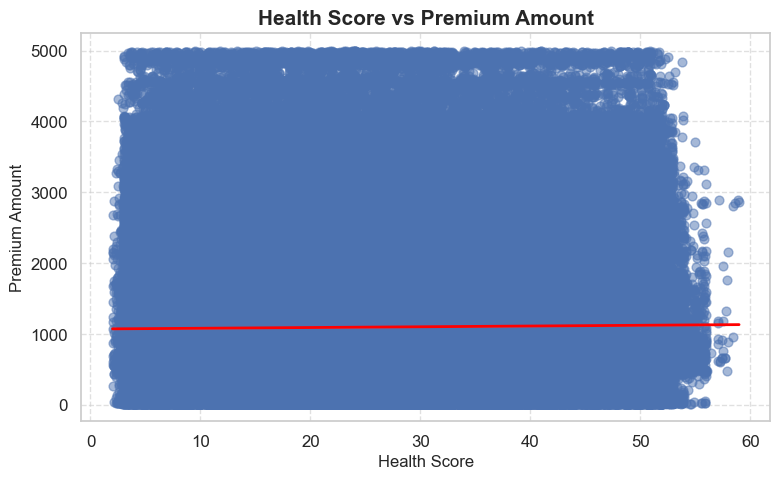

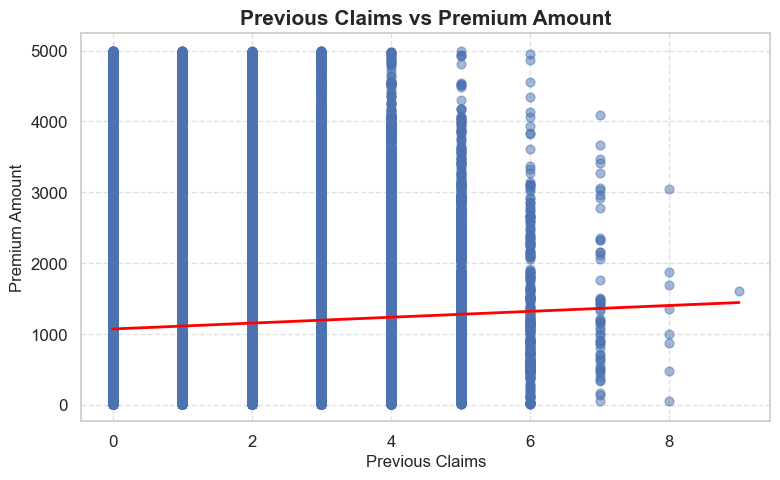

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style and font scale for better readability
sns.set(style='whitegrid', font_scale=1.1)

# List of numerical features
numerical_cols = ['Age', 'Annual Income', 'Health Score', 'Previous Claims']

# Plot: Feature vs Premium Amount
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    
    # Scatterplot with a trendline (optional)
    sns.regplot(
        data=train_df,
        x=col,
        y='Premium Amount',
        scatter_kws={'alpha': 0.5, 's': 40},  # Transparency and size of dots
        line_kws={'color': 'red', 'lw': 2},  # Trend line customization
        ci=95  # Confidence interval for the trend line
    )
    
    # Title and labels
    plt.title(f'{col} vs Premium Amount', fontsize=15, weight='bold')
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Premium Amount', fontsize=12)
    
    # Grid and layout
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


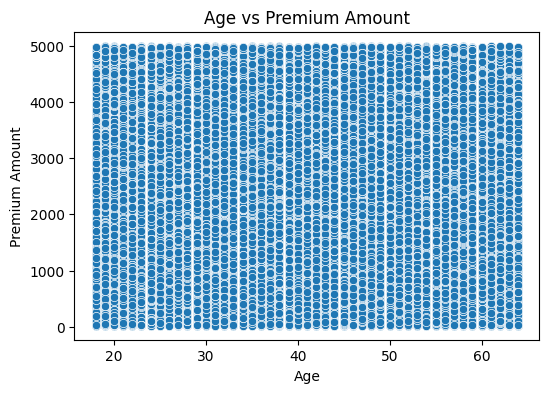

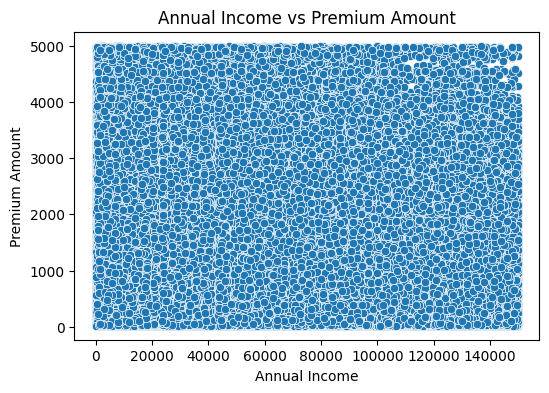

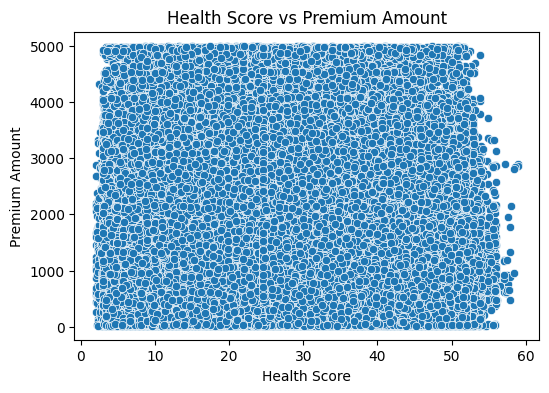

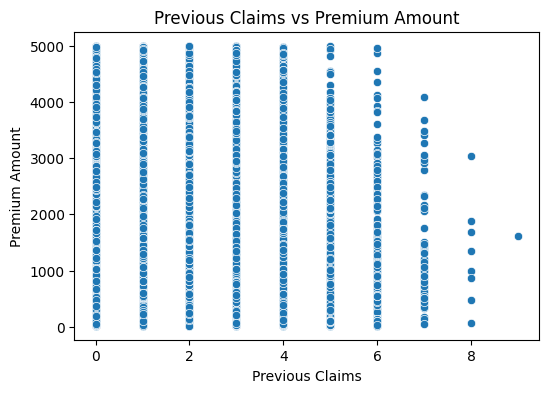

In [40]:
# Target vs Key Features
# Numerical vs Target
for col in ['Age', 'Annual Income', 'Health Score', 'Previous Claims']:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=train_df[col], y=train_df['Premium Amount'])
    plt.title(f'{col} vs Premium Amount')
    plt.show()


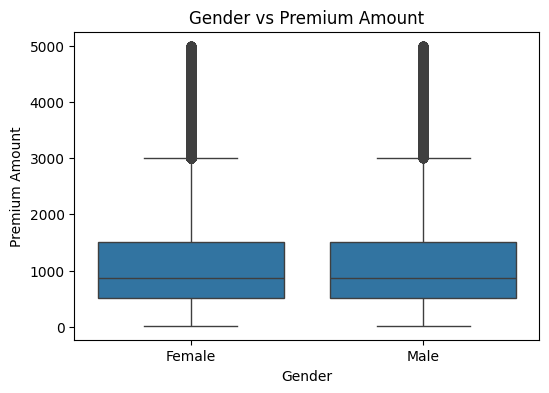

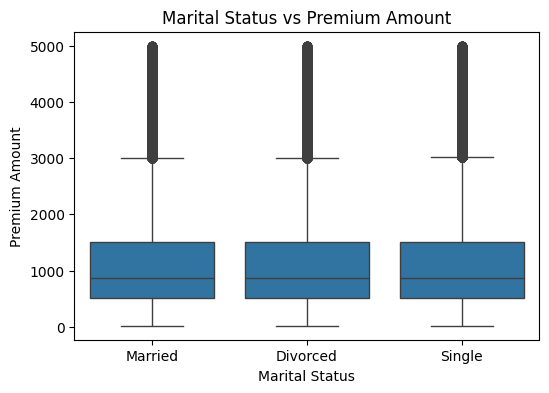

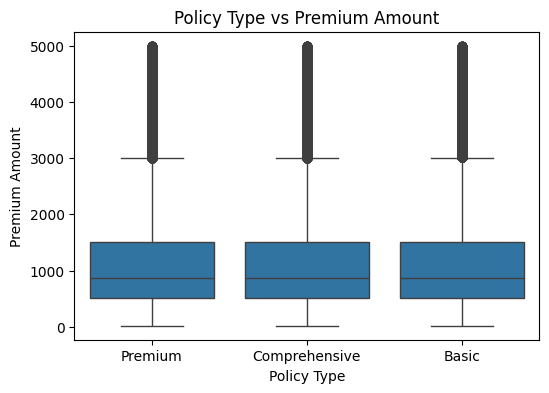

In [41]:
# Categorical vs Target 
for col in ['Gender', 'Marital Status', 'Policy Type']:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=train_df[col], y=train_df['Premium Amount'])
    plt.title(f'{col} vs Premium Amount')
    plt.show()


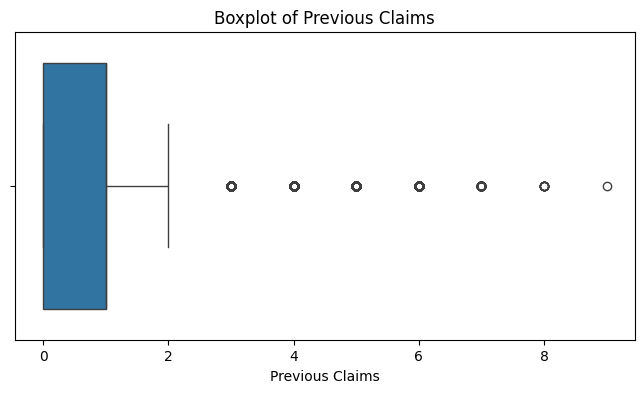

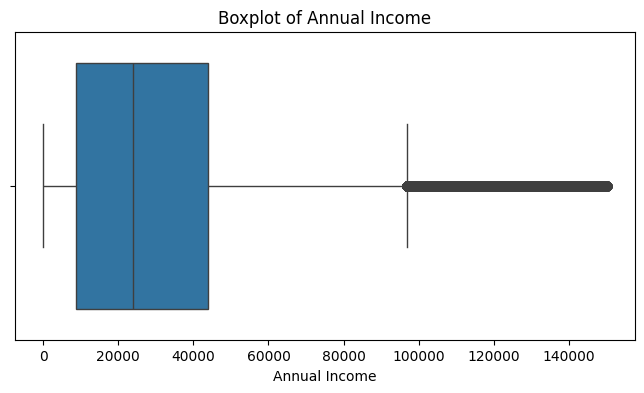

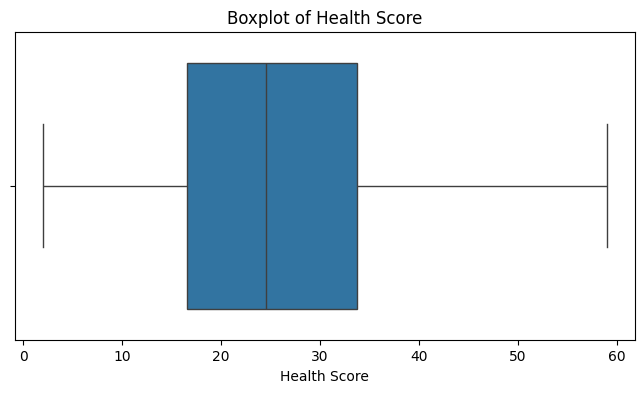

In [42]:
# Outlier Detection in Numerical Features

for col in ['Previous Claims', 'Annual Income', 'Health Score']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=train_df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

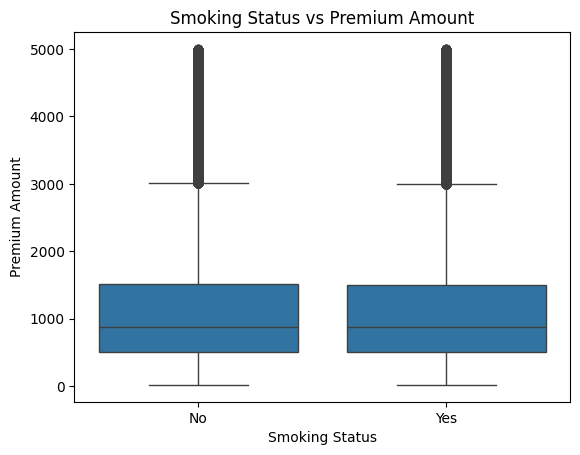

In [43]:
#  Feature Interaction
sns.boxplot(x='Smoking Status', y='Premium Amount', data=train_df)
plt.title('Smoking Status vs Premium Amount')
plt.show()


In [23]:
# Convert date column early
for df in [train_df, test_df]:
    df['Policy Start Date'] = pd.to_datetime(df['Policy Start Date'], errors='coerce')

In [3]:
# Data Preprocessing 
# Handling Missing Values in Numerical Features
numerical_cols = train_df.select_dtypes(include=['float64', 'int64']).columns

# Replace missing values in numerical columns with the median
for col in numerical_cols:
    train_df[col] = train_df[col].fillna(train_df[col].median())
    if col in test_df.columns:
       test_df[col] = test_df[col].fillna(train_df[col].median())


# Handling Missing Values in Categorical columns
categorical_cols = train_df.select_dtypes(include=['object']).columns

# Replace missing values in categorical columns with the mode 
for col in categorical_cols:
    train_df[col] = train_df[col].fillna(train_df[col].mode()[0])
    test_df[col] = test_df[col].fillna(train_df[col].mode()[0])

# Check if there are any remaining missing values
print(train_df.isnull().sum())
print(test_df.isnull().sum())

id                      0
Age                     0
Gender                  0
Annual Income           0
Marital Status          0
Number of Dependents    0
Education Level         0
Occupation              0
Health Score            0
Location                0
Policy Type             0
Previous Claims         0
Vehicle Age             0
Credit Score            0
Insurance Duration      0
Policy Start Date       0
Customer Feedback       0
Smoking Status          0
Exercise Frequency      0
Property Type           0
Premium Amount          0
dtype: int64
id                      0
Age                     0
Gender                  0
Annual Income           0
Marital Status          0
Number of Dependents    0
Education Level         0
Occupation              0
Health Score            0
Location                0
Policy Type             0
Previous Claims         0
Vehicle Age             0
Credit Score            0
Insurance Duration      0
Policy Start Date       0
Customer Feedback       0

In [24]:
# Feature Engineering
for df in [train_df, test_df]:
    df['Policy Start Year'] = df['Policy Start Date'].dt.year
    df['Policy Start Month'] = df['Policy Start Date'].dt.month
    df['Policy Start Day'] = df['Policy Start Date'].dt.day
    df['Policy Age (Days)'] = (pd.to_datetime("today") - df['Policy Start Date']).dt.days

print(train_df[['Policy Start Date', 'Policy Start Year', 'Policy Start Month', 'Policy Start Day', 'Policy Age (Days)']].head())
print(test_df[['Policy Start Date', 'Policy Start Year', 'Policy Start Month', 'Policy Start Day', 'Policy Age (Days)']].head())

           Policy Start Date  Policy Start Year  Policy Start Month  \
0 2023-12-23 15:21:39.134960               2023                  12   
1 2023-06-12 15:21:39.111551               2023                   6   
2 2023-09-30 15:21:39.221386               2023                   9   
3 2024-06-12 15:21:39.226954               2024                   6   
4 2021-12-01 15:21:39.252145               2021                  12   

   Policy Start Day  Policy Age (Days)  
0                23                520  
1                12                714  
2                30                604  
3                12                348  
4                 1               1272  
           Policy Start Date  Policy Start Year  Policy Start Month  \
0 2023-06-04 15:21:39.245086               2023                   6   
1 2024-04-22 15:21:39.224915               2024                   4   
2 2023-04-05 15:21:39.134960               2023                   4   
3 2023-10-25 15:21:39.134960               

In [5]:
# Feature Engineering
# age group feature
age_bins = [18, 30, 45, 60, 100]
age_labels = ['18–30', '31–45', '46–60', '60+']

train_df['Age Group'] = pd.cut(train_df['Age'], bins=age_bins, labels=age_labels, include_lowest=True)
test_df['Age Group'] = pd.cut(test_df['Age'], bins=age_bins, labels=age_labels, include_lowest=True)

In [6]:
# Customer feedback encoding
feedback_map = {'Poor': 0, 'Average': 1, 'Good': 2}
train_df['Customer_Feedback_Score'] = train_df['Customer Feedback'].map(feedback_map)
test_df['Customer_Feedback_Score'] = test_df['Customer Feedback'].map(feedback_map)

In [8]:
import numpy as np
# Income Bracket
income_bins = [0, 30000, 60000, 100000, np.inf]
income_labels = ['Low', 'Median', 'High', 'Very High']

train_df['Income_Bracket'] = pd.cut(train_df['Annual Income'], bins= income_bins, labels=income_labels)
test_df['Income_Bracket'] = pd.cut(test_df['Annual Income'], bins=income_bins, labels=income_labels)

In [16]:
import numpy as np
credit_bins = [0, 400, 600, 800, np.inf]
credit_labels = ['Poor', 'Fair', 'Good', 'Excellent']

train_df['Credit_Category'] = pd.cut(train_df['Credit Score'], bins=credit_bins, labels=False)
test_df['Credit_Category'] = pd.cut(test_df['Credit Score'], bins=credit_bins, labels=False)

In [ ]:
# Dependents Group
train_df['dependents group'] = train_df['Number of Dependents'].apply(lambda x: 'None' if x == 0 else 'Few' if x <= 2 else 'Many')
test_df['dependents group'] = test_df['Number of Dependents'].apply(lambda x: 'None' if x == 0 else 'Few' if x <= 2 else 'Many')


In [10]:
#  Days since policy start
train_df['Policy Start Date'] = pd.to_datetime(train_df['Policy Start Date'], errors='coerce')
test_df['Policy Start Date'] = pd.to_datetime(test_df['Policy Start Date'], errors='coerce')
today = pd.Timestamp.now()
train_df['Days_Since_Policy_Start'] = (today - train_df['Policy Start Date']).dt.days
test_df['Days_Since_Policy_Start'] = (today - test_df['Policy Start Date']).dt.days

In [11]:
# Interaction Features
train_df['Age_x_Health'] = train_df['Age'] * train_df['Health Score']
test_df['Age_x_Health'] = test_df['Age'] * test_df['Health Score']

train_df['CreditScore_x_PrevClaims'] = train_df['Credit Score'].fillna(0) * train_df['Previous Claims'].fillna(0)
test_df['CreditScore_x_PrevClaims'] = test_df['Credit Score'].fillna(0) * test_df['Previous Claims'].fillna(0)
# Risk Flags
train_df['Is_Smoker'] = train_df['Smoking Status'].apply(lambda x: 1 if x.lower() == 'yes' else 0)
test_df['Is_Smoker'] = test_df['Smoking Status'].apply(lambda x: 1 if x.lower() == 'yes' else 0)

In [25]:
train_df['Low_Credit_Score'] = train_df['Credit Score'].apply(lambda x: 1 if x < 600 else 0)
test_df['Low_Credit_Score'] = test_df['Credit Score'].apply(lambda x: 1 if x < 600 else 0)

In [ ]:
train_df['Multiple_Claims'] = train_df['Previous Claims'].apply(lambda x: 1 if x > 2 else 0)
test_df['Multiple_Claims'] = test_df['Previous Claims'].apply(lambda x: 1 if x > 2 else 0)

In [13]:
# Exercise Frequency Encoding
exercise_map = {'Daily': 4, 'Weekly': 3, 'Monthly': 2,'Rarely': 1,'Never': 0}
train_df['Exercise_Freq_Score'] = train_df['Exercise Frequency'].map(exercise_map)
test_df['Exercise_Freq_Score'] = test_df['Exercise Frequency'].map(exercise_map)

In [14]:
train_df['Income_x_Credit'] = train_df['Annual Income'] * train_df['Credit Score']
test_df['Income_x_Credit'] = test_df['Annual Income'] * test_df['Credit Score']

In [26]:
print("Train missing values:\n", train_df.isnull().sum()[train_df.isnull().sum() > 0])
print("\nTest missing values:\n", test_df.isnull().sum()[test_df.isnull().sum() > 0])

Train missing values:
 Series([], dtype: int64)

Test missing values:
 Series([], dtype: int64)


In [27]:
leaky_features = ['Customer Feedback'] 
train_df.drop(columns=leaky_features, errors='ignore')
test_df.drop(columns=leaky_features,  errors='ignore')

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Is_Smoker,Multiple_Claims,Exercise_Freq_Score,Income_x_Credit,Policy Start Year,Policy Start Month,Policy Start Day,Policy Age (Days),Credit_Category,Low_Credit_Score
0,1200000,28.0,Female,2310.0,Single,4.0,Bachelor's,Self-Employed,7.657981,Rural,...,1,0,3,1374450.0,2023,6,4,722,1,1
1,1200001,31.0,Female,126031.0,Married,2.0,Master's,Self-Employed,13.381379,Suburban,...,1,0,1,46883532.0,2024,4,22,399,0,1
2,1200002,47.0,Female,17092.0,Divorced,0.0,PhD,Unemployed,24.354527,Urban,...,1,0,2,13998348.0,2023,4,5,782,3,0
3,1200003,28.0,Female,30424.0,Divorced,3.0,PhD,Self-Employed,5.136225,Suburban,...,1,0,4,23426480.0,2023,10,25,579,2,0
4,1200004,24.0,Male,10863.0,Divorced,2.0,High School,Unemployed,11.844155,Suburban,...,0,0,3,8201565.0,2021,11,26,1277,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799995,1999995,50.0,Female,38782.0,Married,1.0,Bachelor's,Employed,14.498639,Rural,...,1,0,4,11983638.0,2021,7,9,1417,0,1
799996,1999996,41.0,Female,73462.0,Single,0.0,Master's,Employed,8.145748,Rural,...,0,0,4,43709890.0,2023,3,28,790,1,1
799997,1999997,26.0,Female,35178.0,Single,0.0,Master's,Employed,6.636583,Urban,...,0,0,2,20930910.0,2019,9,30,2065,1,1
799998,1999998,34.0,Female,45661.0,Single,3.0,Master's,Employed,15.937248,Urban,...,0,0,3,21323687.0,2022,5,9,1113,1,1


In [28]:
print(train_df.dtypes)
print(test_df.dtypes)

id                                   int64
Age                                float64
Gender                              object
Annual Income                      float64
Marital Status                      object
Number of Dependents               float64
Education Level                     object
Occupation                          object
Health Score                       float64
Location                            object
Policy Type                         object
Previous Claims                    float64
Vehicle Age                        float64
Credit Score                       float64
Insurance Duration                 float64
Policy Start Date           datetime64[ns]
Customer Feedback                   object
Smoking Status                      object
Exercise Frequency                  object
Property Type                       object
Premium Amount                     float64
Age Group                           object
Customer_Feedback_Score              int64
Income_Brac

In [19]:
# Convert object and category columns to string
for col in train_df.select_dtypes(include=['object', 'category']).columns:
    train_df[col] = train_df[col].astype(str)
for col in test_df.select_dtypes(include=['object', 'category']).columns:
    test_df[col] = test_df[col].astype(str)

In [ ]:
# Model Development
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Fix Git warning for MLflow 
import os
os.environ["GIT_PYTHON_REFRESH"] = "quiet"


# Set random seed for reproducibility
np.random.seed(42)

# Define target and features
TARGET = 'Premium Amount'
X = train_df.drop(columns=[TARGET, 'id', 'Policy Start Date'], errors='ignore')
y = train_df[TARGET]

for col in X.select_dtypes(include='object').columns:
    X[col] = X[col].astype('category')

for col in X.select_dtypes(include=['int64', 'int32']).columns:
    if X[col].isna().any():
        X[col] = X[col].astype('float64')  
              
# Split data
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=42)


        
# Identify numeric and categorical features
numeric_features = X.select_dtypes(include=['float64', 'int64', 'int32']).columns.tolist()
categorical_features = X.select_dtypes(include=['category']).columns.tolist()

# Transformers
numeric_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# Define pipeline
pipelines = {
    'Linear Regression': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', LinearRegression())
    ]),
    'Decision Tree': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', DecisionTreeRegressor(random_state=42))
    ]),
    'Random Forest': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(random_state=42, n_jobs=1))
    ]),
    'XGBoost': Pipeline([
        ('preprocessor', preprocessor),
        ('regressor', XGBRegressor(random_state=42, verbosity=0))
    ])
}
models = {
    'LinearRegression': LinearRegression(),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=42),
    'RandomForestRegressor': RandomForestRegressor( random_state=42,), 
    'XGBRegressor': XGBRegressor(objective='reg:squarederror', random_state=42)  
}

# Define parameter grids
param_grids = {
    'Linear Regression': {},
    'Decision Tree': {
        'regressor__max_depth': [5, 10, 20, None],
        'regressor__min_samples_split': [2, 5, 10]
    },
    'Random Forest': {
        'regressor__n_estimators': [50],
        'regressor__max_depth': [7]
    },
    'XGBoost': {
        'regressor__n_estimators': [50],
        'regressor__max_depth': [6]
    }
}
#  Model training & Evaluation
results = {}
for name, pipeline in pipelines.items():
    
    grid = GridSearchCV(pipeline, param_grids[name], cv=2, scoring='neg_mean_squared_error', n_jobs=1)
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
       
    preds = np.clip(best_model.predict(X_eval), 0, None)
    
    rmse = np.sqrt(mean_squared_error(y_eval, preds))
    mae = mean_absolute_error(y_eval, preds)
    r2 = r2_score(y_eval, preds)

    print(f"\n----- {name} -----")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R²: {r2:.4f}")

    results[name] = (best_model, rmse, mae, r2)

# Select best model (lowest RMSE)
best_model_name = min(results, key=lambda x: results[x][1])
best_model = results[best_model_name][0]
print(f"\nBest model: {best_model_name}")


----- Linear Regression -----
RMSE: 862.69
MAE: 666.74
R²: 0.0041

----- Decision Tree -----
RMSE: 845.76
MAE: 638.81
R²: 0.0428

----- Random Forest -----
RMSE: 845.98
MAE: 643.96
R²: 0.0423

----- XGBoost -----
RMSE: 845.02
MAE: 643.27
R²: 0.0445

Best model: XGBoost


In [32]:
import mlflow
import mlflow.sklearn

# MLflow Logging
mlflow.set_experiment("Insurance Premium Prediction")

with mlflow.start_run():
    best_model.fit(X_train, y_train)
    preds = best_model.predict(X_eval)

    # Ensure no negative values for RMSLE
    preds = np.clip(preds, 0, None)
    y_eval_clipped = np.clip(y_eval, 0, None)

    # Metrics
    rmse = np.sqrt(mean_squared_error(y_eval_clipped, preds))
    mae = mean_absolute_error(y_eval_clipped, preds)
    r2 = r2_score(y_eval_clipped, preds)
    rmsle = np.sqrt(np.mean((np.log1p(preds) - np.log1p(y_eval_clipped)) ** 2))

    # Log metrics
    mlflow.log_metric("RMSE", rmse)
    mlflow.log_metric("MAE", mae)
    mlflow.log_metric("R2", r2)
    mlflow.log_metric("RMSLE", rmsle)

    # Log model
    mlflow.sklearn.log_model(best_model, "model",  input_example=X_eval.iloc[:1])
    print(f"Logged model with RMSE={rmse:.2f}, MAE={mae:.2f}, R2={r2:.4f}, RMSLE={rmsle:.4f}")


C:\Users\mythi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\mlflow\types\utils.py:452: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
  warnings.warn(
2025/05/27 01:19:52 WARNING mlflow.models.signature: Failed to infer the model signature from the input example. Reason: MlflowException("Failed to e

Logged model with RMSE=845.02, MAE=643.27, R2=0.0445, RMSLE=1.1458


In [31]:
import pickle
# Save the best model to a local file
with open("best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)